In [7]:
from tensorflow.keras.layers import (Input, Dense,Activation, BatchNormalization, Conv1D, Conv2D,MaxPooling1D, MaxPooling2D, LSTM, GRU, Embedding, Bidirectional,
                         Concatenate,Dropout, Embedding,Convolution1D, Flatten,Layer)
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import initializers
from tensorflow.keras.layers import Layer, InputSpec
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
# Performance:
from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
# import pydot_ng as pydot
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical as labelEncoding   # Usages: Y = labelEncoding(Y, dtype=int)
from tensorflow.keras.utils import plot_model,model_to_dot  

from sklearn.metrics import (confusion_matrix, classification_report, matthews_corrcoef, precision_score, roc_curve, auc)
from sklearn.model_selection import (StratifiedKFold, KFold, train_test_split)
from layers import MultiHeadAttention,Attention,AttLayer
from scipy import interp
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score,accuracy_score,recall_score,matthews_corrcoef,confusion_matrix,roc_curve, precision_recall_curve
import numpy as np
my_seed = 42
np.random.seed(my_seed)
import random 
random.seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed)

In [2]:
def lossPlot(results):
    plt.title(label='Loss: Training and Validation')
    plt.plot(results.history['loss'], label='Training Loss')
    plt.plot(results.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#end-def

def accuracyPlot(results):
    plt.title(label='Accuracy: Training and Validation')
    plt.plot(results.history['accuracy'], label='Training Accuracy')
    plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
def rocPlot(TPR, meanFPR):
    plt.plot([0,1], [0,1],linestyle = '--',lw = 2,color = 'black')
    meanTPR = np.mean(TPR, axis=0)
    meanAUC = auc(meanFPR, meanTPR)
    plt.plot(meanFPR, meanTPR, color='blue',
            label=r'Mean ROC (AUC = %0.4f )' % (meanAUC),lw=2, alpha=1)

    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic Curve (ROC Curve)')
    plt.legend(loc="lower right")
    plt.savefig('ROC-240.png')
    plt.show()

In [3]:
def model1():
    in_put = Input(shape = (100,20))
    a = Convolution1D(128,3,activation='relu',padding='valid')(in_put)
    a = BatchNormalization()(a)
#     a = MaxPooling1D(pool_size=3, strides=1,padding='valid')(a)
    b = Convolution1D(128,3,activation='relu',padding='valid')(a)
    b = BatchNormalization()(b)
    c = Convolution1D(256,3,activation='relu',padding='valid')(b)
    c = MaxPooling1D(pool_size=3, strides=1,padding='valid')(c)
    c = Dropout(0.2)(c)
    d = Bidirectional(LSTM(128,return_sequences=True))(c)
#     d = MultiHeadAttention(head_num=64, activation='relu', use_bias=True, 
#                                 return_multi_attention=False, name='Multi-Head-Attention')(d)
    head = Flatten()(d)
#     e = Dropout(0.5)(head)
    e = Dense(128, activation='relu', name='FC3')(head)
    e = Dropout(rate=0.5)(e)
    e = Dense(64, activation='relu', name='FC2')(e)
    
    e = Dense(32, activation='relu', name='FC4')(e)
    
    output = Dense(2, activation='softmax', name='Output')(e)

    return Model(inputs = [in_put],outputs = [output])

In [4]:
model = model1()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 20)]         0         
                                                                 
 conv1d (Conv1D)             (None, 98, 128)           7808      
                                                                 
 batch_normalization (BatchN  (None, 98, 128)          512       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           49280     
                                                                 
 batch_normalization_1 (Batc  (None, 96, 128)          512       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 94, 256)           98560 

Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6711 - accuracy: 0.6094
Epoch 00001: val_accuracy improved from -inf to 0.52577, saving model to my_model_onehot/our_model_test\firstModel1.tf
97/97 [==============================] - 10s 34ms/step - loss: 0.6702 - accuracy: 0.6108 - val_loss: 0.6836 - val_accuracy: 0.5258
Epoch 2/100
95/97 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.7484
Epoch 00002: val_accuracy improved from 0.52577 to 0.68428, saving model to my_model_onehot/our_model_test\firstModel1.tf
97/97 [==============================] - 3s 26ms/step - loss: 0.5229 - accuracy: 0.7484 - val_loss: 0.6379 - val_accuracy: 0.6843
Epoch 3/100
96/97 [============================>.] - ETA: 0s - loss: 0.4266 - accuracy: 0.8174
Epoch 00003: val_accuracy did not improve from 0.68428
97/97 [==============================] - 3s 26ms/step - loss: 0.4241 - accuracy: 0.8186 - val_loss: 0.6827 - val_accuracy: 0.5284
Epoch 4/100
96/97 [=========

C:\Users\c's'z\AppData\Local\Temp/ipykernel_9040/1082776347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.934158784142842
Accuracy: [0.8567010164260864]
Sensitivity:  [0.8639175257731959]
Specificity:  [0.8494845360824742]
MCC: [0.71347637828331]
Precision:  [0.8516260162601627]
Epoch 1/100
97/97 [==============================] - ETA: 0s - loss: 0.6626 - accuracy: 0.5912
Epoch 00001: val_accuracy improved from -inf to 0.50515, saving model to my_model_onehot/our_model_test\firstModel2.tf
97/97 [==============================] - 5s 30ms/step - loss: 0.6626 - accuracy: 0.5912 - val_loss: 0.6886 - val_accuracy: 0.5052
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.7461
Epoch 00002: val_accuracy improved from 0.50515 to 0.68170, saving model to my_model_onehot/our_model_test\firstModel2.tf
97/97 [==============================] - 2s 24ms/step - loss: 0.5280 - accuracy: 0.7461 - val_loss: 0.6279 - val_accuracy: 0.6817
Epoch 3/100
97/97 [==============================] - ETA: 0s - loss: 0.4174 - accuracy: 0.8164
Epoch 00003: val_accuracy improve

Epoch 00027: early stopping
31/31 [==============================] - 0s 9ms/step - loss: 0.8739 - accuracy: 0.8711


C:\Users\c's'z\AppData\Local\Temp/ipykernel_9040/1082776347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.9479455840153044
Accuracy: [0.8567010164260864, 0.8711340427398682]
Sensitivity:  [0.8639175257731959, 0.8391752577319588]
Specificity:  [0.8494845360824742, 0.9030927835051547]
MCC: [0.71347637828331, 0.7437889525544287]
Precision:  [0.8516260162601627, 0.8964757709251101]
Epoch 1/100
96/97 [============================>.] - ETA: 0s - loss: 0.6743 - accuracy: 0.5934
Epoch 00001: val_accuracy improved from -inf to 0.49485, saving model to my_model_onehot/our_model_test\firstModel3.tf
97/97 [==============================] - 5s 31ms/step - loss: 0.6734 - accuracy: 0.5941 - val_loss: 0.6910 - val_accuracy: 0.4948
Epoch 2/100
97/97 [==============================] - ETA: 0s - loss: 0.5271 - accuracy: 0.7381
Epoch 00002: val_accuracy improved from 0.49485 to 0.60954, saving model to my_model_onehot/our_model_test\firstModel3.tf
97/97 [==============================] - 3s 26ms/step - loss: 0.5271 - accuracy: 0.7381 - val_loss: 0.6359 - val_accuracy: 0.6095
Epoch 3/100
95/97 [========

C:\Users\c's'z\AppData\Local\Temp/ipykernel_9040/1082776347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.935436284408545
Accuracy: [0.8567010164260864, 0.8711340427398682, 0.8494845628738403]
Sensitivity:  [0.8639175257731959, 0.8391752577319588, 0.8742268041237113]
Specificity:  [0.8494845360824742, 0.9030927835051547, 0.8247422680412371]
MCC: [0.71347637828331, 0.7437889525544287, 0.6998264366027988]
Precision:  [0.8516260162601627, 0.8964757709251101, 0.8330058939096268]
Epoch 1/100
95/97 [============================>.] - ETA: 0s - loss: 0.6560 - accuracy: 0.6184
Epoch 00001: val_accuracy improved from -inf to 0.51160, saving model to my_model_onehot/our_model_test\firstModel4.tf
97/97 [==============================] - 5s 31ms/step - loss: 0.6539 - accuracy: 0.6211 - val_loss: 0.6853 - val_accuracy: 0.5116
Epoch 2/100
95/97 [============================>.] - ETA: 0s - loss: 0.5063 - accuracy: 0.7572
Epoch 00002: val_accuracy improved from 0.51160 to 0.69974, saving model to my_model_onehot/our_model_test\firstModel4.tf
97/97 [==============================] - 3s 28ms/step - lo

C:\Users\c's'z\AppData\Local\Temp/ipykernel_9040/1082776347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


AUC: 0.940252949303858
Accuracy: [0.8567010164260864, 0.8711340427398682, 0.8494845628738403, 0.8649484515190125]
Sensitivity:  [0.8639175257731959, 0.8391752577319588, 0.8742268041237113, 0.843298969072165]
Specificity:  [0.8494845360824742, 0.9030927835051547, 0.8247422680412371, 0.8865979381443299]
MCC: [0.71347637828331, 0.7437889525544287, 0.6998264366027988, 0.7305820764085037]
Precision:  [0.8516260162601627, 0.8964757709251101, 0.8330058939096268, 0.8814655172413793]
Epoch 1/100
95/97 [============================>.] - ETA: 0s - loss: 0.6638 - accuracy: 0.6128
Epoch 00001: val_accuracy improved from -inf to 0.48840, saving model to my_model_onehot/our_model_test\firstModel5.tf
97/97 [==============================] - 5s 32ms/step - loss: 0.6634 - accuracy: 0.6115 - val_loss: 0.7055 - val_accuracy: 0.4884
Epoch 2/100
96/97 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7256
Epoch 00002: val_accuracy improved from 0.48840 to 0.57861, saving model to my_mo

C:\Users\c's'z\AppData\Local\Temp/ipykernel_9040/1082776347.py:85: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  TPR.append(interp(meanFPR, fpr, tpr))


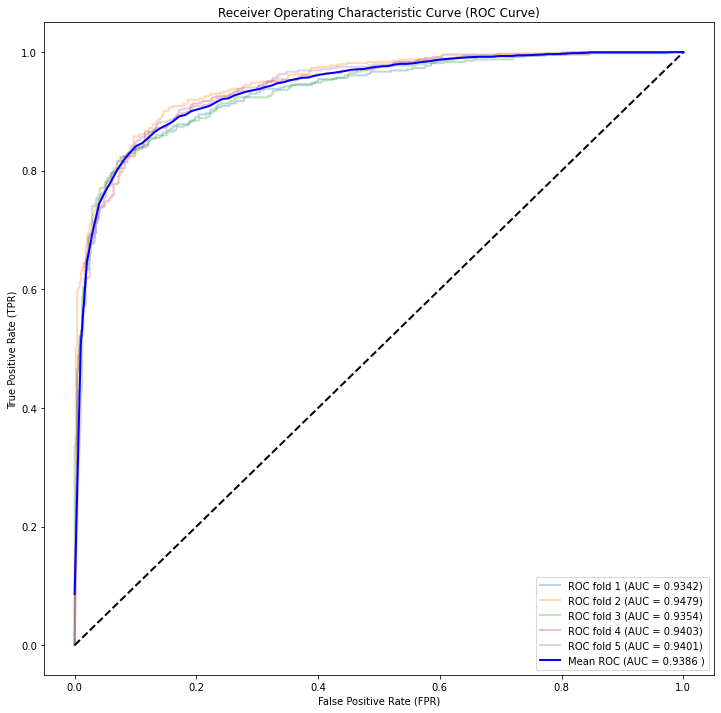

Accuracy [Each Fold]: [0.8567010164260864, 0.8711340427398682, 0.8494845628738403, 0.8649484515190125, 0.8711340427398682]
Accuracy: 0.8627
Sensitivity: 0.8602
Specificity: 0.8652
MCC: 0.7260
Precision: 0.8654


In [5]:
if __name__ == '__main__':
    config = tf.compat.v1.ConfigProto()

    config.gpu_options.allow_growth = True

    session = tf.compat.v1.Session(config=config)
    # X1 = np.load('process_data/train/lh_train.npy')
    data1 = np.load('one_hot_data/BPF.npz')
    X1 = data1['X_train']
    X2 = data1['X_test']
    y_1 = pd.read_csv('data/Process_data/train/y_train.csv').to_numpy()
    y1 = labelEncoding(y_1, dtype=int)
    y_2 = pd.read_csv('data/Process_data/test/y_test.csv').to_numpy()
    y2 = labelEncoding(y_2,dtype=int)

    setEpochNumber     = 100 # Performed-welled in epoch 600.50
    setBatchSizeNumber = 32 #26，32
    ####################################################

    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    Accuracy = []
    Sensitivity = []
    Specificity = []
    Precision = []
    MCC = []

    # ROC Curve:
    fig1 = plt.figure(figsize=[12,12])

    TPR = []
    meanFPR = np.linspace(0, 1, 100)

    i = 1

    names = ['first']
    name=names[0]
    nn = 1
    
    for train, test in cv.split(y1):

        # Compile Model:
        model = model1()
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        
        filepath = 'my_model_onehot/our_model_test/%sModel%d.tf' % (name,nn)
        
#         filepath = 'my_model/our_model_7_test/%sModel%d.h5' % (name,nn)
        
        checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
        callbacks_list = [checkpoint]
        back = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, mode='auto')
        # Run Model:
        results = model.fit(x=[X1[train,:]],
                            y=y1[train,:],
                            validation_data=([X1[test,:]],y1[test,:]),
                            batch_size=setBatchSizeNumber, epochs=setEpochNumber,
                            verbose=1,
                            callbacks=[callbacks_list, back])


        nn += 1
        accuracy = model.evaluate(x=[X2],y=y2 )
        Accuracy.append(accuracy[1])

        # Performance Metices:
        Yactual = y_2
        Yp = model.predict([X2])
        v = Yp
        Yp = Yp.argmax(axis=1)

        CM = confusion_matrix(y_pred=Yp, y_true=Yactual)
        TN, FP, FN, TP = CM.ravel()

        MCC.append(matthews_corrcoef(y_true=Yactual, y_pred=Yp))
        Sensitivity.append( TP / (TP + FN) )
        Specificity.append( TN / (TN + FP) )
        Precision.append(precision_score(y_true=Yactual, y_pred=Yp))

        # ROC Curve
        fpr, tpr, _ = roc_curve(Yactual, v[:,1])
        TPR.append(interp(meanFPR, fpr, tpr))
        rocauc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i, rocauc))
        i= i+1

        # Performance Plot
#         print('#################################################')
#         print('Fold\'s Accuracy: {:.2f}'.format(accuracy[1]*100.0))
#         lossPlot(results)
#         accuracyPlot(results)
#         print('#################################################')

        print('AUC:',rocauc)
        print('Accuracy:',Accuracy)
        print('Sensitivity: ',Sensitivity)
        print('Specificity: ',Specificity)
        print('MCC:',MCC)
        print('Precision: ',Precision)
        
        

    #end-for

    rocPlot(TPR, meanFPR)

    print('Accuracy [Each Fold]: {}'.format(Accuracy))
    print('Accuracy: {:.4f}'.format(np.sum(Accuracy)/5.0))
    print('Sensitivity: {0:.4f}'.format(np.sum(Sensitivity)/5.00))
    print('Specificity: {0:.4f}'.format(np.sum(Specificity)/5.00))
    print('MCC: {0:.4f}'.format(np.sum(MCC)/5.00))
    print('Precision: {0:.4f}'.format(np.sum(Precision)/5.00))

In [8]:
names = ['first']
for name in names:
    for i in [1,2,3,4,5]:
        model = model1()
        model.load_weights("my_model_onehot/our_model_test/%sModel%d.tf" % (name,i))
        y_tes = y_2
        y_p = model.predict([X2])
        y_pred1 = y_p.argmax(axis=1)
        acc = accuracy_score(y_tes, y_pred1)
        sn = recall_score(y_tes, y_pred1)
        mcc = matthews_corrcoef(y_tes, y_pred1)
        tn, fp, fn, tp = confusion_matrix(y_tes, y_pred1).ravel()
        sp = tn / (tn + fp)
        fpr, tpr, _ = roc_curve(y_tes, y_p[:,1])
        rocauc = auc(fpr, tpr)
#         rocauc = roc_auc_score(y_tes, y_p[:,1])
        aupr = average_precision_score(y_tes, y_pred1)
        f1 = f1_score(y_tes, np.round(y_pred1.reshape(-1)))
        print("ACC : ", acc)
        print("SN : ", sn)
        print("SP : ", sp)
        print("MCC : ", mcc)
        print("AUC : ", rocauc)
        print("AUPR : ", aupr)
        print("f1_score : ", f1)

ACC :  0.865979381443299
SN :  0.8556701030927835
SP :  0.8762886597938144
MCC :  0.732114399452866
AUC :  0.9367541715378893
AUPR :  0.8197504069451982
f1_score :  0.8645833333333334
ACC :  0.8639175257731959
SN :  0.845360824742268
SP :  0.8824742268041237
MCC :  0.7283368316502126
AUC :  0.9483770857689447
AUPR :  0.8194993266959536
f1_score :  0.861344537815126
ACC :  0.8608247422680413
SN :  0.822680412371134
SP :  0.8989690721649485
MCC :  0.72375868102047
AUC :  0.9342416834945265
AUPR :  0.8213595360824743
f1_score :  0.8553054662379421
ACC :  0.8608247422680413
SN :  0.8865979381443299
SP :  0.8350515463917526
MCC :  0.7226101216384172
AUC :  0.9422744181103199
AUPR :  0.8042247826965838
f1_score :  0.864321608040201
ACC :  0.8742268041237113
SN :  0.8721649484536083
SP :  0.8762886597938144
MCC :  0.7484599720535995
AUC :  0.9422807949835263
AUPR :  0.827739002369213
f1_score :  0.8739669421487604
